# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Final Project Group 196: Milestone 4

**Harvard University**<br/>
**Fall 2024**<br/>
**Group Members & Awesome People**: Zachary Sardi-Santos, Sarah Mrad, Adam Latif, Samaga Pokharel

<hr style="height:2.4pt">

# 🎓 PROBLEM STATEMENT #



The SP500, or Standard & Poor's 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. Investors in the SP500 index face a problem trying to estimate their return on investment based on the plethora of microeconomic and macroeconomic factors that influence the index. Thus, given their investing circumstances and knowledge, they invest inappropriate amounts of capital and do not maximize their earning potential.

We will solve this problem by building prediction models using many economic, financial, and stock-market-related features to predict monthly returns on the SP500 index. Our final model will be used as a tool for these investors to accurately predict future returns on the index given current and future projected financial scenarios. 

As a side note, the original direction of this final project was to identify multiple factors influencing stock prices through PCA. However, after conversations with Pavlos and our TF Javier, we decided against pursuing a PCA-focused project because there is much more viability in producing a model that retains the original features.  This is because future traders will look at the features we use as inputs to the models we create in their market research. Thus we want to maintain the sanctity and "purity" of the features themselves and not turn them into principle components that are not easily interpretable by users of our model. Additionally, Pavlos told us that it would result in a better grade if we went above and beyond PCA, citing the fact that building prediction models and performing causal inference will be more complex and realistic.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold



In [2]:
merged_df = pd.read_csv('Final Submission/merged_df.csv')

In [3]:
merged_df = merged_df.drop('Unnamed: 0', axis=1 )
merged_df = merged_df.rename(columns = {'bbkmgdp':'gdp'})

In [4]:
merged_df.head()

,consumer_sentiment,federal_funds_rate,gdp,labor_force_participation_rate,m2,yield_10_year,mortgage_30_year,msci,savings_rate,sp500_monthly_open,sp500_monthly_high,sp500_monthly_low,close,sp500_monthly_volume,sp500_pe_ratio,vehicle_sales,unemployment_rate,percent_change
0,97.4,5.25,0.284662,67.0,3834.6,6.579048,7.8240,102815.407672,5.9,740.74,794.67,729.55,786.16,1.163583e+10,19.53,15.682,5.3,6.131706
1,99.7,5.19,4.986687,66.9,3846.3,6.419474,7.6500,103978.699659,6.0,786.16,817.68,773.43,790.82,9.715930e+09,20.09,15.271,5.2,0.592755
2,100.0,5.39,6.322837,67.1,3861.2,6.694500,7.8975,101902.554128,6.1,790.82,814.90,756.13,757.12,1.012076e+10,19.69,15.816,5.2,-4.261400
3,101.4,5.51,7.677815,67.1,3877.0,6.885455,8.1425,105214.055674,6.2,757.12,804.13,733.54,801.34,1.045488e+10,18.94,15.058,5.1,5.840554
4,103.2,5.50,6.596759,67.1,3889.2,6.710952,7.9440,111689.040528,6.5,801.34,851.87,793.21,848.28,1.010665e+10,20.60,15.088,4.9,5.857688


Here are brief descriptions of the predictors:

1. **percent_change**: Monthly percentage change in the S&P 500's prices. This will be our target variable!
2. **consumer_sentiment**: A measure of the general mood or outlook of consumers toward the economy.
3. **federal_funds_rate**: The interest rate at which depository institutions lend balances to each other overnight.
4. **bbkmgdp**: Bank credit as a percentage of GDP, a measure of financial sector size.
5. **labor_force_participation_rate**: The percentage of the working-age population engaged in or seeking employment.
6. **m2**: The money supply, including cash, checking, and near-money assets.
7. **yield_10_year**: The interest rate on a 10-year government bond.
8. **mortgage_30_year**: Average interest rate for a 30-year fixed-rate mortgage.
9. **msci**: The MSCI index, tracking global stock performance.
10. **savings_rate**: The percentage of personal disposable income saved by households.
11. **sp500_monthly_open**: The S&P 500's opening price at the start of the month.
12. **sp500_monthly_high**: The highest price the S&P 500 reached in the month.
13. **sp500_monthly_low**: The lowest price the S&P 500 reached in the month.
14. **close**: The closing price of the S&P 500 at the end of the month.
15. **sp500_monthly_volume**: The trading volume of the S&P 500 during the month.
16. **sp500_pe_ratio**: The price-to-earnings ratio of the S&P 500, reflecting valuation.
17. **vehicle_sales**: Monthly vehicle sales figures.
18. **unemployment_rate**: The percentage of the labor force currently without jobs but actively seeking work.


# 🎓 EDA #

To perform EDA, we will display covariances between features using a heatmap plot. This is because we suspect to be there some degree of correlation between at least a few of our features given that many economic indicators are correleated. We will also display scatterplots between each feature and the response variable to see if there are any obvious relationships in the data. Finally, we will show boxplots of each feature to determine if there are any significant outliers in the data. 

In [5]:
merged_df.isna().sum()

consumer_sentiment                0
federal_funds_rate                0
gdp                               0
labor_force_participation_rate    0
m2                                0
yield_10_year                     0
mortgage_30_year                  0
msci                              0
savings_rate                      0
sp500_monthly_open                0
sp500_monthly_high                0
sp500_monthly_low                 0
close                             0
sp500_monthly_volume              0
sp500_pe_ratio                    0
vehicle_sales                     0
unemployment_rate                 0
percent_change                    0
dtype: int64

In [6]:
merged_df.describe()

,consumer_sentiment,federal_funds_rate,gdp,labor_force_participation_rate,m2,yield_10_year,mortgage_30_year,msci,savings_rate,sp500_monthly_open,sp500_monthly_high,sp500_monthly_low,close,sp500_monthly_volume,sp500_pe_ratio,vehicle_sales,unemployment_rate,percent_change
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000
mean,85.638154,2.181200,2.383294,64.618462,10241.720308,3.525145,5.337417,259037.250088,5.708000,1877.298462,1942.548523,1810.286585,1888.688123,6.361483e+10,25.810954,15.998049,5.623077,0.682535
std,14.238548,2.145877,6.668529,1.890791,5226.852632,1.480597,1.487568,140558.847703,3.092014,1047.316582,1084.370377,1011.339001,1056.377166,3.274470e+10,14.627439,2.146347,1.900598,4.515492
min,50.000000,0.050000,-71.169764,60.100000,3834.600000,0.623636,2.684000,98206.434744,1.400000,729.570000,794.670000,666.790000,735.090000,9.715930e+09,13.500000,8.944000,3.400000,-16.942453
25%,74.300000,0.150000,1.074584,62.900000,6075.700000,2.300000,3.992500,151650.712669,4.400000,1143.490000,1188.460000,1105.360000,1144.940000,2.995128e+10,18.940000,15.096000,4.300000,-1.825751
50%,88.300000,1.430000,2.807535,64.600000,8639.800000,3.562273,5.286000,207631.899493,5.500000,1397.860000,1434.270000,1343.350000,1400.380000,7.063877e+10,22.730000,16.634000,5.000000,1.132224
75%,96.500000,4.630000,4.127269,66.300000,13481.000000,4.651500,6.572000,333454.035267,6.300000,2380.130000,2400.980000,2322.250000,2384.200000,8.456134e+10,27.550000,17.503000,6.200000,3.579400
max,112.000000,6.540000,45.512001,67.300000,21723.200000,6.885455,8.515000,637995.854724,32.000000,4778.140000,4931.090000,4682.110000,4845.650000,1.621854e+11,123.730000,22.055000,14.800000,12.684410


In [7]:
covariance = merged_df.cov()
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
scaler = StandardScaler()
scaled_df = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.827330,1.432297,-0.315192,1.261488,-1.227699,2.065796,1.674153,-1.113148,0.062191,-1.086883,-1.060199,-1.070267,-1.045297,-1.589850,-0.430057,-0.147477,-0.170249,1.208633
1,0.989113,1.404293,0.391002,1.208519,-1.225457,1.957853,1.557004,-1.104859,0.094582,-1.043449,-1.038947,-1.026812,-1.040879,-1.648573,-0.391714,-0.339260,-0.222945,-0.019913
2,1.010215,1.497639,0.591677,1.314458,-1.222602,2.143893,1.723639,-1.119652,0.126974,-1.038992,-1.041514,-1.043945,-1.072830,-1.636190,-0.419102,-0.084949,-0.222945,-1.096571
3,1.108691,1.553646,0.795181,1.314458,-1.219574,2.273063,1.888591,-1.096056,0.159365,-1.071219,-1.051462,-1.066316,-1.030905,-1.625971,-0.470455,-0.438652,-0.275641,1.144055
4,1.235303,1.548979,0.632817,1.314458,-1.217237,2.155022,1.754946,-1.049919,0.256539,-1.028932,-1.007368,-1.007224,-0.986402,-1.636622,-0.356794,-0.424653,-0.381034,1.147856


In [9]:
scaled_df.columns = merged_df.columns
scaled_df.columns

Index(['consumer_sentiment', 'federal_funds_rate', 'gdp',
       'labor_force_participation_rate', 'm2', 'yield_10_year',
       'mortgage_30_year', 'msci', 'savings_rate', 'sp500_monthly_open',
       'sp500_monthly_high', 'sp500_monthly_low', 'close ',
       'sp500_monthly_volume', 'sp500_pe_ratio', 'vehicle_sales',
       'unemployment_rate', 'percent_change'],
      dtype='object')

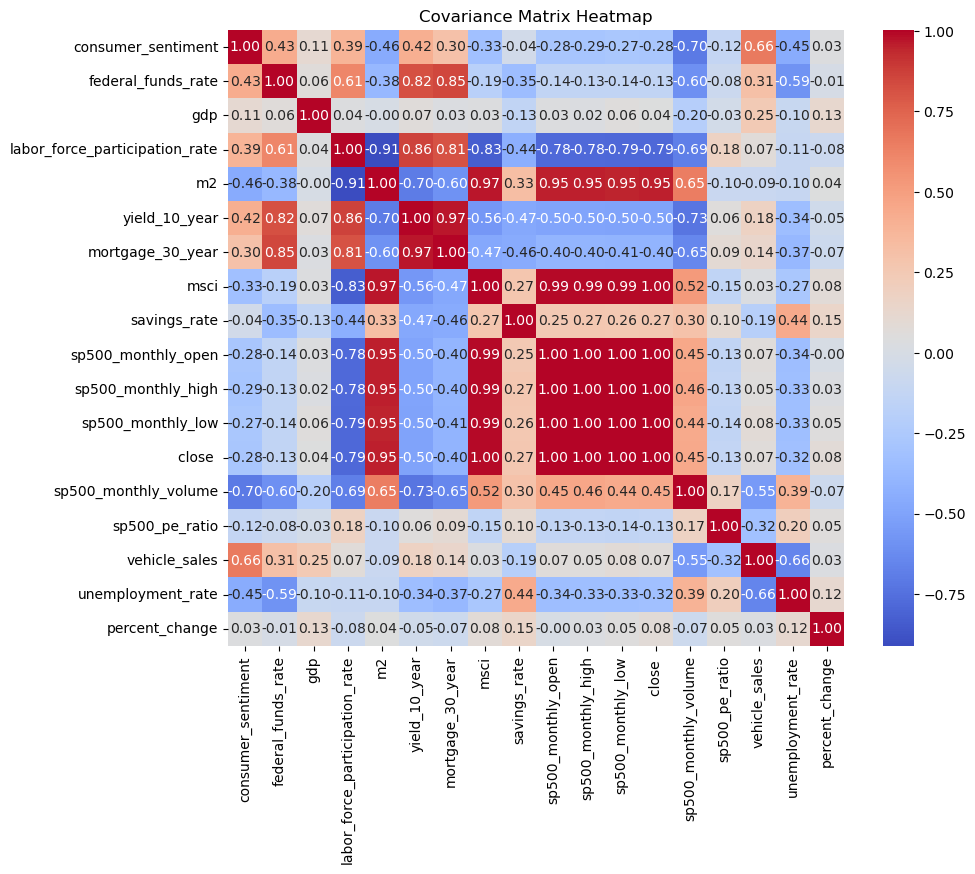

In [10]:
covariance = scaled_df.cov()
plt.figure(figsize=(10, 8))  
sns.heatmap(covariance, annot=True, cmap = 'coolwarm', fmt=".2f", square=True)

plt.title("Covariance Matrix Heatmap")
plt.show()

**Some Examples of Highly Correlated Features ( > 0.9)**
10 year yield rate and the 30 year mortgage rate are highly correlated with a rating of 0.97. According to CBS News, This relationship exists because "10-year treasury notes and mortgage-backed securities typically compete for the same investors". Thus, when the 10-year treasury rates increase, investors need to be incentivized to still purchase mortgage rates. Thus, mortgage rates increase in tandem. 

The m2 is highly correlated with the monthly sp500 low and sp500 high prices, with a rating of 0.95. The m2 is cash, checking, and savings account deposits, plus money market fund balances, retail money market fund balances, and small-denomination time deposits. Thus, this correlation makes sense. The greater the amount of market fund and small-denomination time deposits of people in the world, the greater the amount of money in invested in the SP500. Therefore, both the low and high monthly prices of the SP500 will increase, given that more money is invested in this index. 

Additionally, the MSCI is highly correlated with both the monthly sp500 low and sp500 high prices, with a rating of 0.99. The MSCI captures mid and large-cap representation across 23 developed markets countries, like the USA, China, and Brazil. It measures the average amount of return given investment in this group of markets. Thus, it makes sense that if the SP500 has increased prices (thus, the monthly low and high values increase), the associated measure for the MSCI will also increase. Many companies on the SP500 are listed on multiple exchanges, like the NASDAQ (USA) or Shanghai Stock Exchange (China). Thus, if these companies have an increase in their prices, the return on investment in these markets given one invested in this company increases, thus the MSCI increases as well. 

There is also the fact that all of the sp500 related features, like the monthly opening/closing/high price are extremely correlated (=1). 

Thus, we must be aware of **multicollinearity** when dealing with these features. One way that we may do this is through lasso regularization for any regression model, which may squash the parameters associated with these variables to zero. This allows us to either keep one feature in a pair of correlated features or get rid of both entirely as they have no explanatory power in sp500 percentages. 

On that note, it is essential to see the percent change (response variable) correlation with the features in our dataset. There seems to be no correlation between our features and the percent_change (sp500 monthly returns) variable. The highest correlation amounts are for the savings rate (0.15) and the unemployment rate (0.12). This is a bit problematic. We believe microeconomic features, like consumer sentiment or sp500 volume, would be much more correlated with the sp500 monthly returns variable than macroeconomic features. Also, how will our model efficiently explain variation in the sp500 monthly returns if our features correlate only slightly with the response variable? 


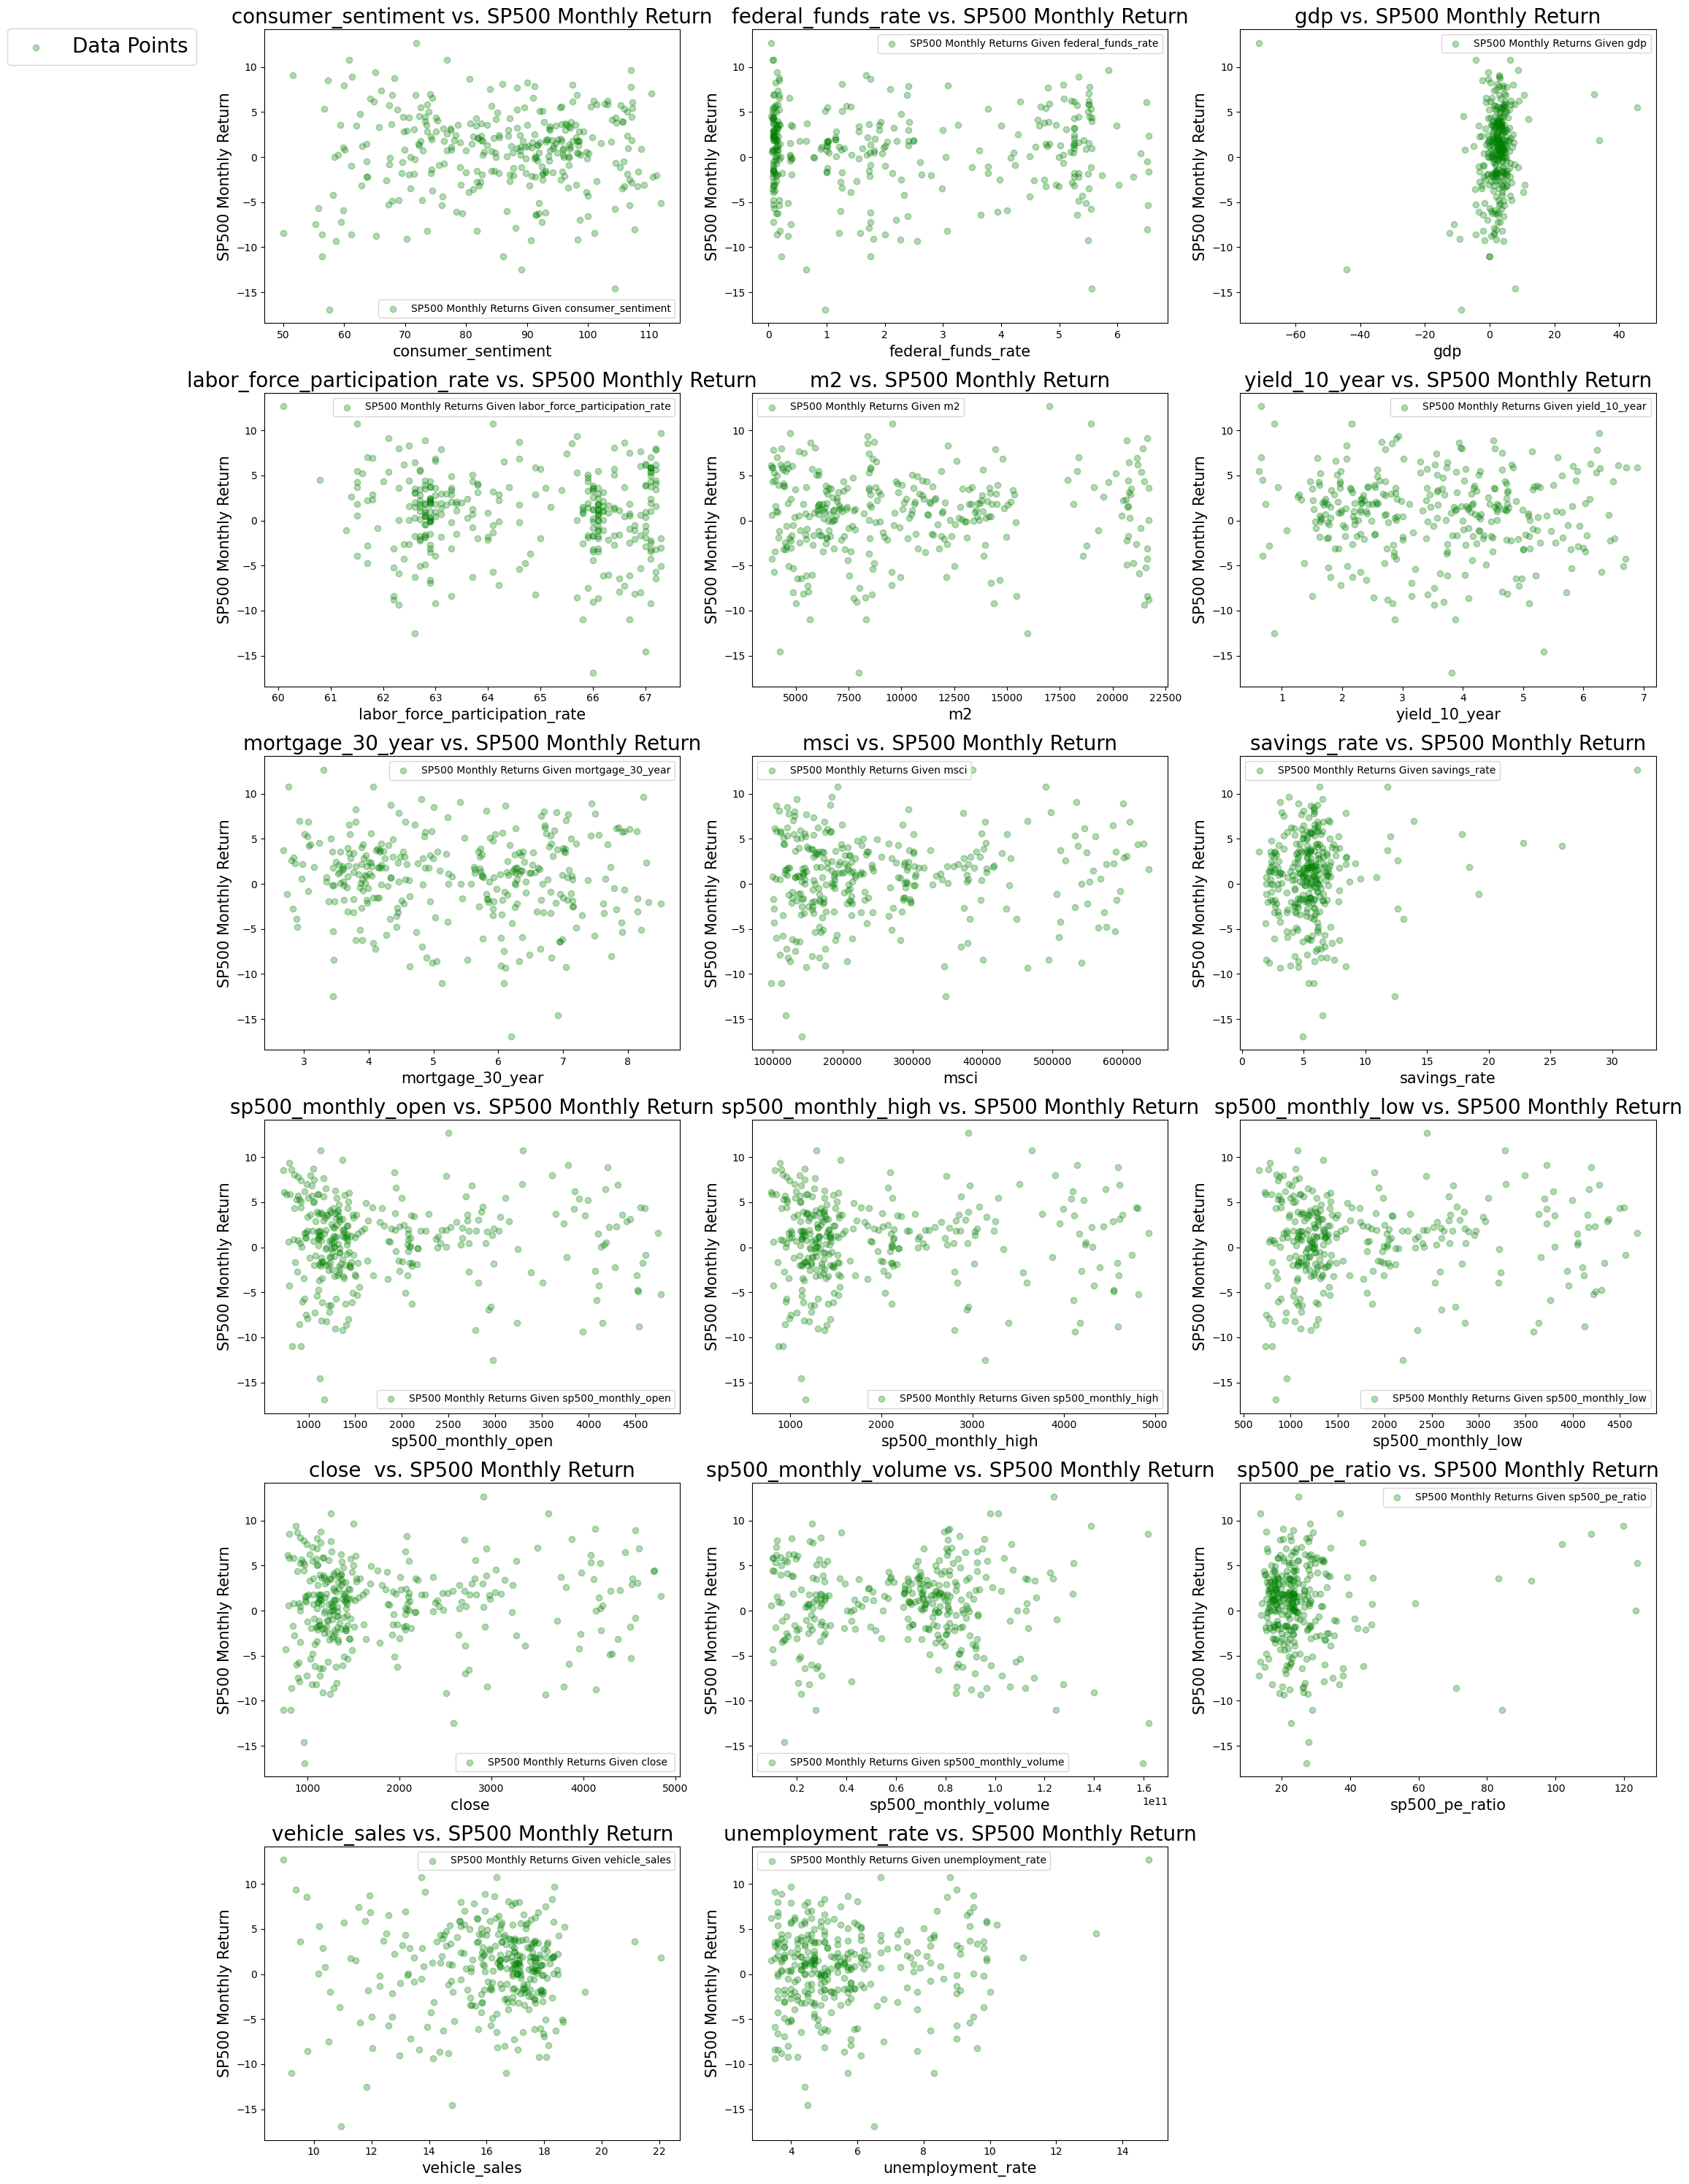

In [11]:
y = merged_df['percent_change'] 

features = [col for col in merged_df.columns if col != 'percent_change']

rows = 6
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))  

axes = axes.flatten()

#loop through features in axes object
for i, feature in enumerate(features):
    if i < len(axes):  # Prevent accessing out-of-bound indices
        axes[i].scatter(x=merged_df[feature], y=y, c='green', alpha=0.30, label = f'SP500 Monthly Returns Given {feature}') 
        #labels + titles
        axes[i].set_xlabel(feature, fontsize=15)
        axes[i].set_ylabel("SP500 Monthly Return", fontsize=15)
        axes[i].set_title(f"{feature} vs. SP500 Monthly Return", fontsize = 20)
        axes[i].legend()

#hide any empty subplots if there are more subplots than features
for i in range(len(features), len(axes)):
    axes[i].axis('off')

fig.legend(['Data Points'], loc='upper right', fontsize=20, bbox_to_anchor=(0, 0.99))
plt.tight_layout()
plt.show()


The scatterplots do not show any discernible linear relationship between any of our features and the reponse variable. It is notable, however, that a number of features are concentrated in certain ranges. S&P 500 PE ratio, GDP growth, and savings rate are all mostly concentratred in narrow ranges with a few large outliers, which we will explore in the next section of the EDA. Several other features appear to be concentrated in a few regions, such as monthly volume, 30 year mortgage rate, and labor force participation rate. These features appear to have data mostly concentrated in two clusters. Given the relationship shown in the scatterplots, there may be a more complex decision boundary determining the monthly return of the S&P500 which may necessitate the use of a decision tree or random forest. 

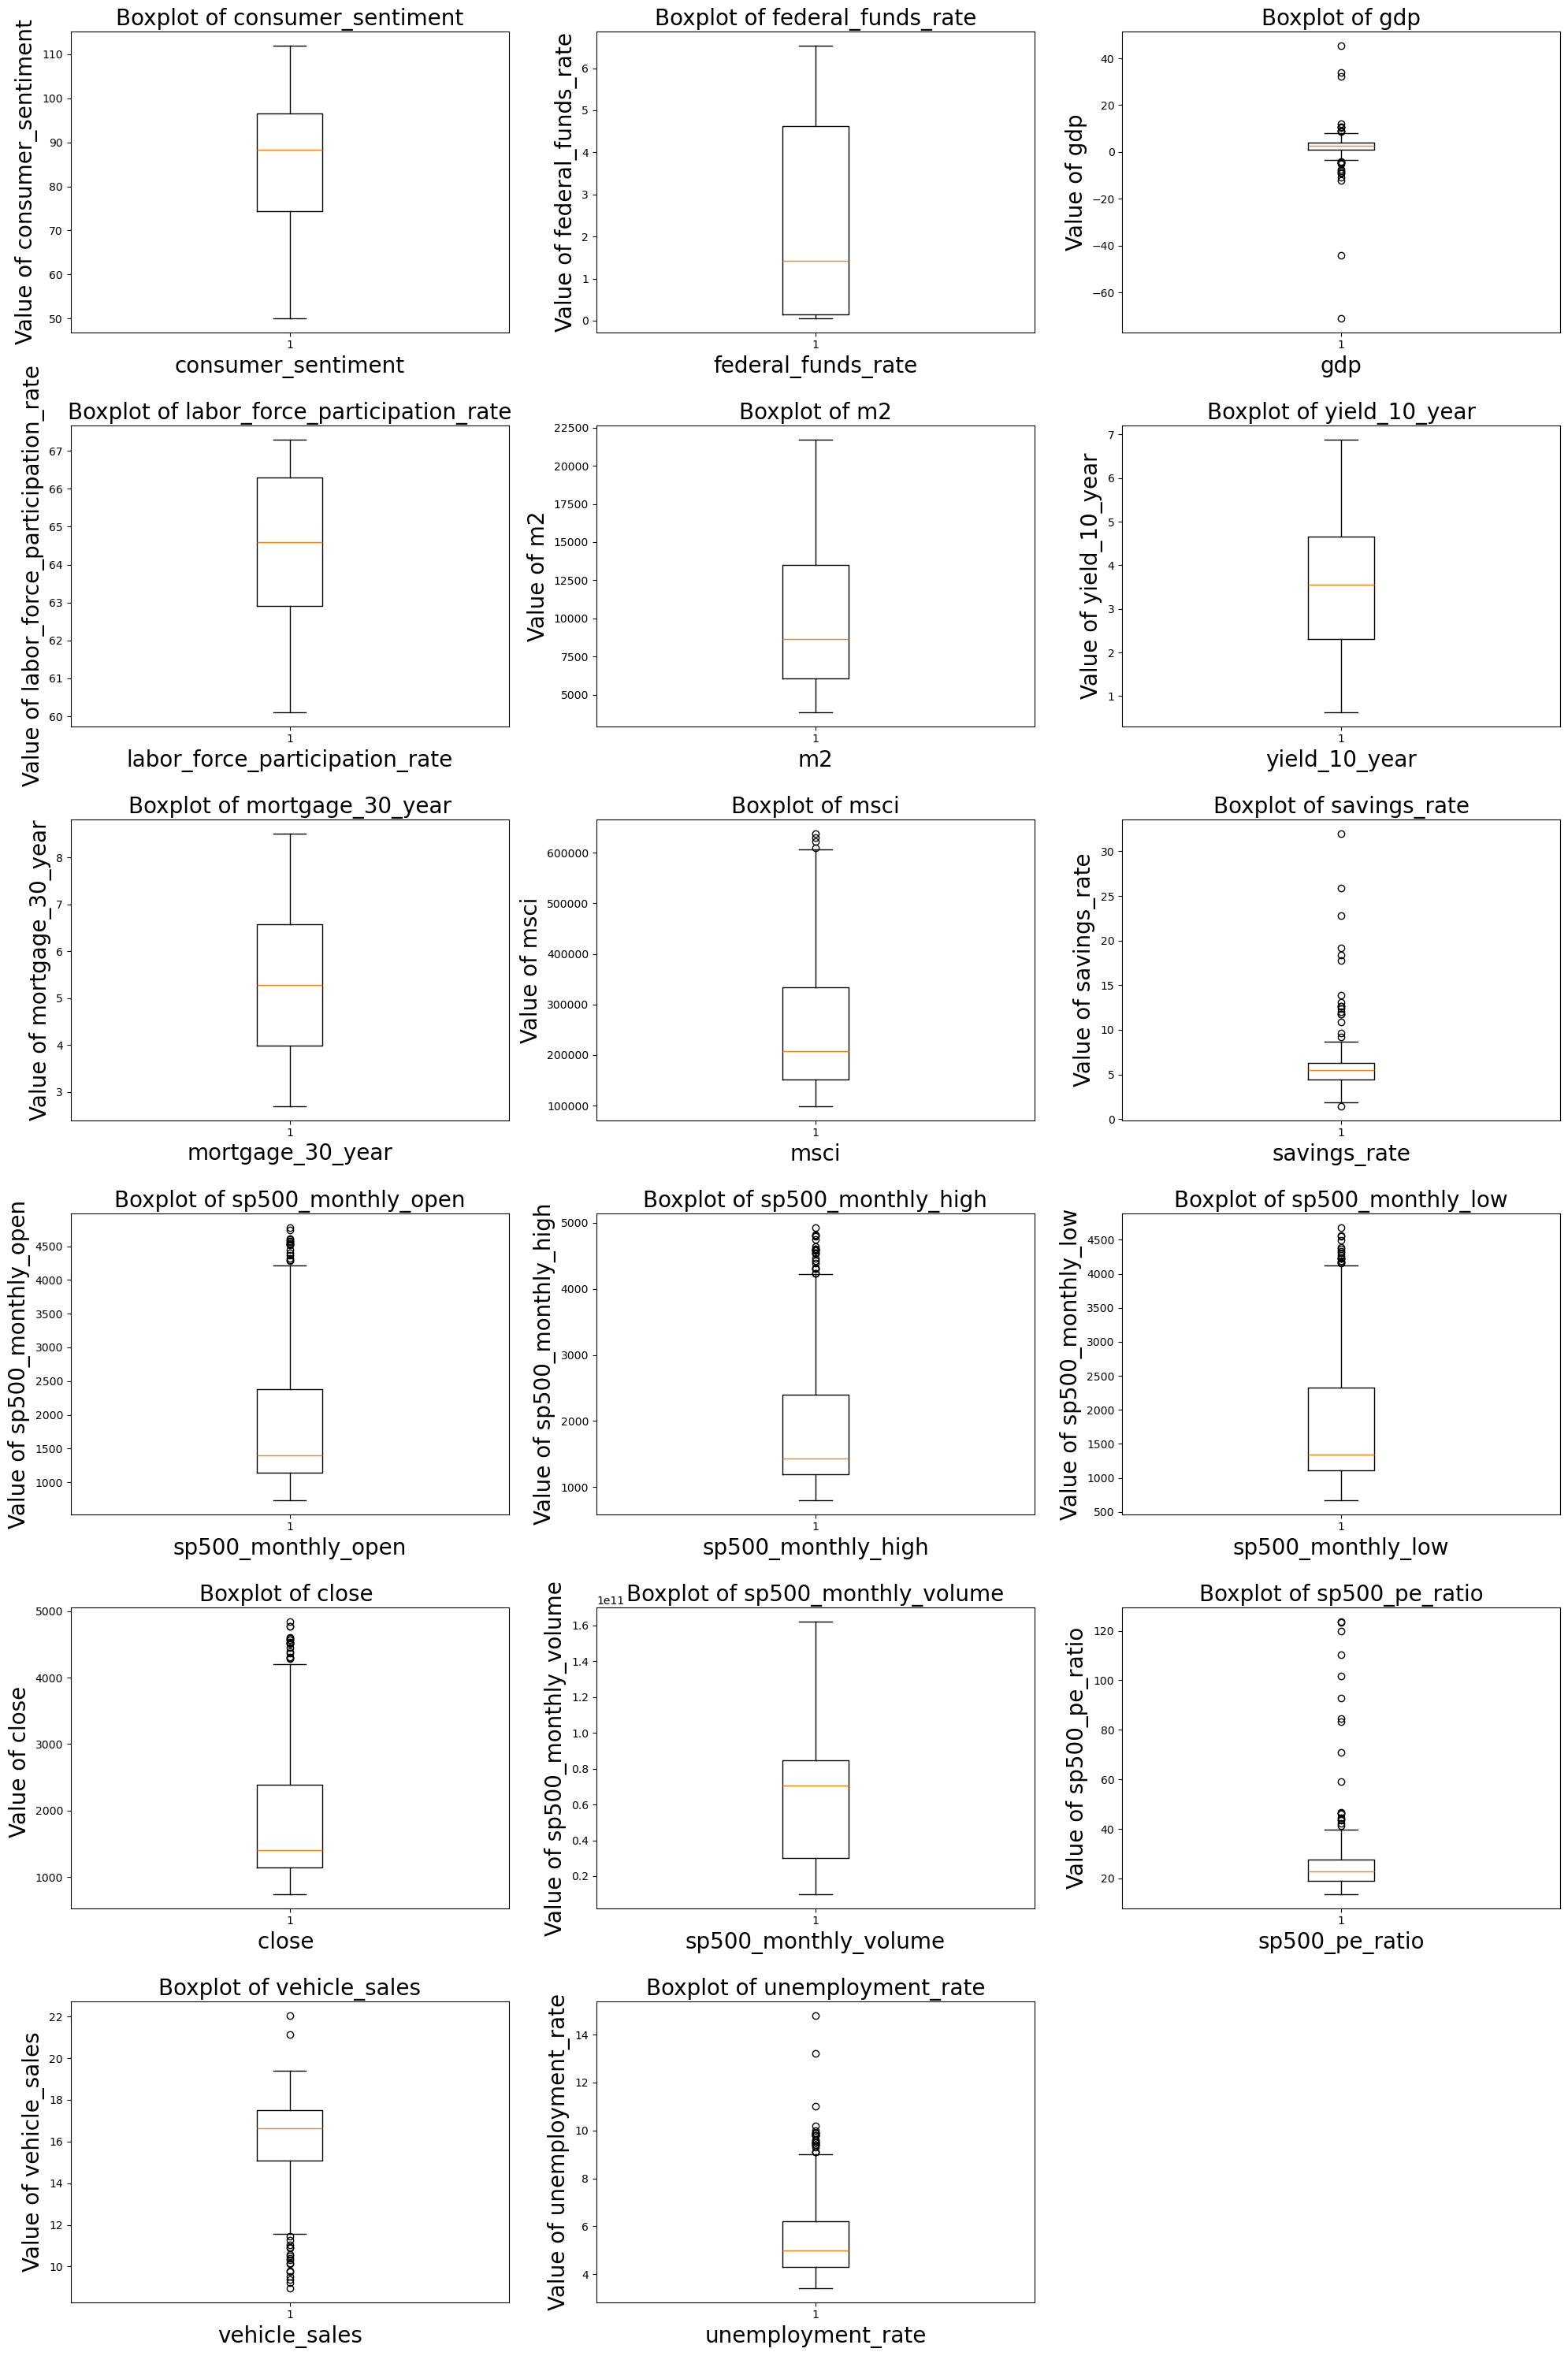

In [12]:
y = merged_df['percent_change'] 

# list of all features (excluding the target column)
features = [col for col in merged_df.columns if col != 'percent_change']

# grid size, 5 rows 3 columns for 15 features
rows = 6
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))  #figsize

# flatten axes like in hw5
axes = axes.flatten()

# loop through each feature
for i, feature in enumerate(features):
    axes[i].boxplot(x = merged_df[feature])
    axes[i].set_xlabel(feature, fontsize = 20)
    axes[i].set_ylabel(f'Value of {feature}', fontsize = 20)
    axes[i].set_title(f'Boxplot of {feature}', fontsize = 20)


#hiding unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


There appears to be a great amount of outliers in the sp500 price to earnings ratio (sp500_pe_ratio), monthly vehicle sales (vehicle_sales), the monthly savings rate (savings_rate), and the sp500_monthly price features like low/open/high price. However, we  do not see a reason to remove any of these features due to the presence of outliers as they reflect natural variation in economic conditions.

For the vehicle sales, it makes sense we have a bunch of low outliers because perhaps people have been buying fewer cars in the present as public transportation has become more reliable or car purchases are particularly sensititive to economic downturns due to their high price. 

For the SP500 related features, these high outliers make sense because we are living in a bull market for the past two years. The SP500 has continuously reached all time highs every month. These outlier values reflect that. Because we want to eventually predict returns on the SP500, it is important to maintain the fact we are living in a bull market and thus keep these outliers related to the SP500 features. 

# 🎓 Baseline Models

Given, the above EDA, there are two main categories of options for us to predict monthly S&P500 returns. The first is through using types of linear regression models. Although we did not see a clear linear relationship between any feature and the response variable, strategies such as regularization or the use of polynomial features may help. Moreover, it makes sense to at least see how a linear regression performs due to its interpretability and the qualitative nature of our features. The second option is through the use of a decision tree-type model as it is better able to handle more complex decision boundaries, which appear to be present given the above EDA.  

As a result, we will train two baseline models. First, we will try a linear regression model. This makes sense as all of our data is quantitative, and it may be possible to predict stock market performance from relationships in the given features. For our baseline model, we will use a multiple linear regression model without polynomial terms, interaction features, or regularization. We will use these techniques to improve our final model. 

In order to perform predictive modelling for linear regression, we will use a pipeline consisting of a standard scaler and a linear regression model. The standard scaler is necessary since some of the features are much larger in scale than others, and we think it would be best to standardize in order to prevent there being any extremely large coefficient values. 

We will also train a random forest. A random forest might work better than linear regression as, based on the EDA, there do not seem to be linear relationships between any one feature and the response variable. This may be due to interactions among the features, which would be better captured by splitting data. There are also a number of outliers in some of the features such as savings rate, monthly high, vehicle sales, and unemployment rate. These might skew any attempts at linear regression, whereas a number of decision trees might capture this variance. We are training a random forest specifically since we aren't really sure which features most predict monthly return, and thus it might be best to introduce some randomness especially if there are interactions among the features. The tradeoff, however, is that a random forest is not easily interpretable and would not be as effective as a tool for traders to predict the monthly S&P 500 return.

To make it easier to train and evaluate models, we use a function to complete all model training and evaluation via cross-validation for model selection. Models will be evaluated by average r^2 due to variation in the scale of the data across features. 

In [13]:
# initialize dataframe to store results
model_performance_df = pd.DataFrame(columns=["Model Name", "Mean_R^2_Score", "R^2_Std"])

# function to evaluate and record results from cross validation 
def evaluate_and_log_model(model, model_name, X_train, y_train, model_performance_df, cv=5):
    """
    Evaluates a model using cross-validation for R^2 and logs the results
    into the provided dataframe without evaluating on a test set.
    """
    # Perform cross-validation for R^2 score
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    mean_r2 = np.mean(cv_r2_scores)
    std_r2 = np.std(cv_r2_scores)

    # Add performance metrics to the dataframe
    new_row = {
        "Model Name": model_name,
        "Mean_R^2_Score": mean_r2,
        "R^2_Std": std_r2
    }
    model_performance_df.loc[len(model_performance_df)] = new_row

    # fit model on full training set in case want to evaluate feature importances
    model.fit(X_train, y_train)

    return model

    

In [14]:
# full feature matrix
X = merged_df.iloc[:,:-1]
X.head()

,consumer_sentiment,federal_funds_rate,gdp,labor_force_participation_rate,m2,yield_10_year,mortgage_30_year,msci,savings_rate,sp500_monthly_open,sp500_monthly_high,sp500_monthly_low,close,sp500_monthly_volume,sp500_pe_ratio,vehicle_sales,unemployment_rate
0,97.4,5.25,0.284662,67.0,3834.6,6.579048,7.8240,102815.407672,5.9,740.74,794.67,729.55,786.16,1.163583e+10,19.53,15.682,5.3
1,99.7,5.19,4.986687,66.9,3846.3,6.419474,7.6500,103978.699659,6.0,786.16,817.68,773.43,790.82,9.715930e+09,20.09,15.271,5.2
2,100.0,5.39,6.322837,67.1,3861.2,6.694500,7.8975,101902.554128,6.1,790.82,814.90,756.13,757.12,1.012076e+10,19.69,15.816,5.2
3,101.4,5.51,7.677815,67.1,3877.0,6.885455,8.1425,105214.055674,6.2,757.12,804.13,733.54,801.34,1.045488e+10,18.94,15.058,5.1
4,103.2,5.50,6.596759,67.1,3889.2,6.710952,7.9440,111689.040528,6.5,801.34,851.87,793.21,848.28,1.010665e+10,20.60,15.088,4.9


In [15]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Linear Regression 

In [16]:
y_train.head()

172   -1.350093
183   -0.749750
17     3.943822
24     4.100941
132   -6.116347
Name: percent_change, dtype: float64

In [17]:
# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale features
    ('regressor', LinearRegression())  # Step 2: Train model
])

# evaluate baseline linear regression via cross validation
evaluate_and_log_model(pipeline, "Baseline Linear Regression", X_train, y_train, model_performance_df, cv=5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [18]:
# show coefficient values
for feature, coef in zip(X.columns, pipeline.named_steps['regressor'].coef_):
    print(f"{feature}: {coef:.4f}")

# intercept 
print("Intercept:", pipeline.named_steps['regressor'].intercept_)

consumer_sentiment: 0.3622
federal_funds_rate: 0.6676
gdp: 0.1427
labor_force_participation_rate: 0.0569
m2: 2.5976
yield_10_year: 1.3516
mortgage_30_year: -1.8517
msci: 2.7363
savings_rate: -0.5123
sp500_monthly_open: -44.2249
sp500_monthly_high: 8.6274
sp500_monthly_low: -4.5086
close : 36.0791
sp500_monthly_volume: -1.3373
sp500_pe_ratio: 0.4502
vehicle_sales: -0.2416
unemployment_rate: 0.4117
Intercept: 0.7173327138611616


In [19]:
# view cross validation statistics
model_performance_df

,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.71887,0.092727


Based on the baseline linear regression model as viewed on the entire training set, the monthly open, monthly high, and monthly low seem to be the most strongly correlated factors with the monthly return of the S&P500. A one standard deviation increase in the monthly open leads to a 44% decrease in the monthly return, a one standard deviation increase in the monthly high leads to a 8.6% increase in the monthly return, a one standard deviation increase in the monthly low leads to a 4.5% decrease in the monthly return, and a one standard deviation increase in the monthly close leads to a 36% increase in the monthly return. Thus, it seems that metrics of performance during the month are most predictive of the S&P500's return that month according to the baseline model. This generally makes sense as a higher monthly close would likely correspond to higher returns that month, higher monthly highs might mean the market is performing well that month, and a higher monthly open might mean the market is overvalued and will fall that month. However, these features are hard to predict return on since they are measured in the same period as the response variable whereas the macroeconomic features could provide a more broad estimate of stock market performance. However, most of the macroeconomic features did not appear to have much of an impact on the S&P500's monthly return. A one standard deviation increase in monthly GDP growth, for example, leads to 0.14% increase in S&P500 return, according to the baseline model.

It is also important to note that the baseline model did not perform particularly well on the test data, with a mean cross validation r^2 score of 0.718. 

## Model 2: Random Forest 

In [20]:
from sklearn.ensemble import RandomForestRegressor

#defining hypterparameters based on our experiences in lab
max_depth_range = [5,10]
min_samples_split_range = list(range(5, 30, 5)) 
min_samples_leaf_range = list(range(1, 20, 5))
n_estimators_range = [10, 25, 50] 
max_features_range = ['sqrt', 'log2']

param_grid = {
    'n_estimators': n_estimators_range,               
    'max_depth': max_depth_range,                     
    'min_samples_split': min_samples_split_range,     
    'min_samples_leaf': min_samples_leaf_range,       
    'max_features': max_features_range               
}

# grid_search cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, error_score='raise')

# fit model
grid_search.fit(X_train, y_train)

# cv error
mean_cv_r2 = grid_search.best_score_
std_cv_r2 = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

new_row = {
        "Model Name": "Random Forest",
        "Mean_R^2_Score": mean_cv_r2,
        "R^2_Std": std_cv_r2
    }

model_performance_df.loc[len(model_performance_df)] = new_row

model_performance_df

/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.718870,0.092727
1,Random Forest,0.053102,0.069201


Since our baseline model was the simple linear regression model, we decided to go ahead and find the random forest model with fully tuned hyperparameters that would best predict the S&P 500 monthly return from our data. We performed a grid-search cross-validation using hyperparameters often used in class and in labs to find the random forest that could best predict our data. Since we are using grid-search cv, we had to manually perform the model training and evaluation. Ultimately, the random forest performed significantly worse than the baseline linear regression model, with the mean cross-validation r^2 score for the best model being only 0.05. As a result, we will not bother analyzing feature importance or any other insights that can be gleaned from this model as it clearly does not perform well. Moving forward, we will focus on refining our linear regression model to better predict the S&P500 monthly return. 

# 🎓 Refining Linear Regression

## Lasso Regularization

Since we identified some collinearity among the features from the EDA, we will use lasso regularization to refine our baseline linear regression model as its ability to squash less useful features to 0 will help perform feature selection for us in model training. Like the linear regression model, we will standardize the data. We will use a  range of penalty terms based on commonly used terms from class and labs to find the best penalty term value, and we will include a large number of iterations to ensure the model is able to converge properly. We need to redefine the evaluate_and_log_model function to adjust to hyperparameter tuning with grid_search first.

In [21]:
# adjust function to use grid search for hyperparameter tuning
def evaluate_and_log_model_with_tuning(model, model_name, param_grid, X_train, y_train, model_performance_df, cv=5, scoring='r2'):
    """
    Evaluates a model using GridSearchCV for hyperparameter tuning, logs the best model's cross-validation R^2 score 
    and standard deviation into the provided dataframe, and fits the best model on the full training set.
    """
    # Use GridSearchCV to tune hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    grid_search.fit(X_train, y_train)

    # Get best model and its metrics
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    mean_r2 = grid_search.best_score_
    std_r2 = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    # Log performance metrics into the dataframe
    new_row = {
        "Model Name": model_name,
        "Mean_R^2_Score": mean_r2,
        "R^2_Std": std_r2
    }
    model_performance_df.loc[len(model_performance_df)] = new_row

    # for evaluating coefficients
    best_model.fit(X_train, y_train)

    # Return the best model
    return best_model

In [22]:
# define alpha terms to test
param_grid = {
    'lasso__alpha': [1, 0.1, 0.01, 0.001, 0.0001]  
}

# initialize pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=15000))
])

lasso_pipeline = evaluate_and_log_model_with_tuning(lasso_pipeline, "Lasso Regularization", param_grid, X_train, y_train, model_performance_df, cv=5, scoring='r2')
lasso_model = lasso_pipeline.named_steps['lasso']


In [23]:
model_performance_df

,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.718870,0.092727
1,Random Forest,0.053102,0.069201
2,Lasso Regularization,0.731129,0.074120


Lasso regularization slightly improved model performance, with a mean cross-validation r^2 score of 0.731 versus the corresponding 0.718 value for the baseline linear regression model. However, these improvements were very slight and not quite what we expected given the assumed collinearity in the model. 

In [24]:
# view coefficients and intercepts of lasso model
lasso_coefficients = lasso_model.coef_
lasso_intercept = lasso_model.intercept_

# show coefficient values
for feature, coef in zip(X.columns, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

# access the intercept via the regressor step
print("Intercept:", lasso_intercept)


consumer_sentiment: 0.3343
federal_funds_rate: 0.5638
gdp: 0.0330
labor_force_participation_rate: -0.0145
m2: 1.7916
yield_10_year: 0.4286
mortgage_30_year: -0.9588
msci: 1.5839
savings_rate: -0.3192
sp500_monthly_open: -37.7726
sp500_monthly_high: 0.0000
sp500_monthly_low: -0.0000
close : 35.3358
sp500_monthly_volume: -1.1484
sp500_pe_ratio: 0.3995
vehicle_sales: -0.3250
unemployment_rate: 0.3561
Intercept: 0.7173327138611596


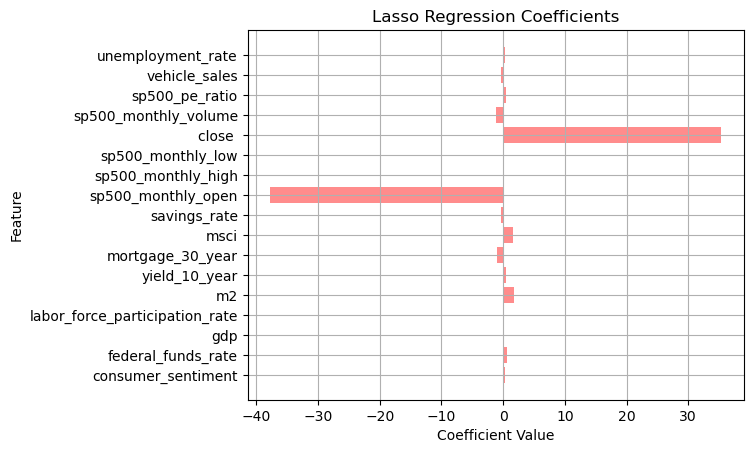

In [25]:
#visualize coefficients
import matplotlib.pyplot as plt
import numpy as np

feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(len(lasso_coefficients))

plt.barh(feature_names, lasso_coefficients, alpha = 0.45, color = 'red')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Regression Coefficients")
plt.grid()
plt.show()

Based on the lasso regularization, several features were crushed to 0 or near 0 importance: monthly low, monthly high, labor force participation rate, and gdp growth. These factors are likely the factors that were highly correlated with the other features. Moreover, we can see that the most important feature is actually the sp500_monthly_open which is negatively correlated with the SP500 returns (with a coefficient value of -37.77, meaning -37.77% return for a 1 standard deviation change in monthly open price). What this suggests is that if the monthly open of the index is relatively high, the monthly return percentage will be relatively low. Vice-Versa as well. This makes perfect sense. **The lower the monthly opening price is, the higher the percentage of relative gain**. Additionally, we've seen a continuing trend of the SP500 growing at a steady rate, which means stocks in the index are growing at a relatively steady rate (as per say, not growing at all). So if the index opens at 1000, but the stocks are generally still growing (let's say 100 dollar growth in a month), then the index has 10% return that month. If the index opens at 2000 and the stocks still grow at the same rate (100 dollars), then the index has 5% return that month. 

The next important feature is the monthly closing price, with a coefficient value of ~35 (35% increase in return for 1 standard deviation change in monthly closing price). This also makes sense. We can clearly reason that if the index's closing price has increased, the associated return on the index has increased. With more money comes more return.

## Polynomial Regression 

To determine if more complex relationships exist between the data, we will train polynomial regression models of several different degrees to see if including polynomial features can improve model performance. Since we know that there is multicollinearity among the features, each polynomial model will be lasso regularized to select for only relevant features. As above, we will use hyperparameter tuning on the lasso penalty term. We had to increase the number of iterations and cut the smallest penalty term to avoid convergence warnings.  

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# define hyperparameters
param_grid = {
    'lasso__alpha': [1, 0.1, 0.01, 0.001]  
}

#lasso polynomial pipeline degree 2 
lasso_poly_pipeline_deg2 = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial features
    ('lasso', Lasso(max_iter=30000))    
])

lasso_poly_pipeline_deg2 = evaluate_and_log_model_with_tuning(lasso_poly_pipeline_deg2, "Degree 2 Polynomial Regression + Lasso Regularization", param_grid, X_train, y_train, model_performance_df, cv=5, scoring='r2')

model_performance_df


/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.520e+00, tolerance: 4.060e-01
  model = cd_fast.enet_coordinate_descent(
/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.249e+00, tolerance: 4.344e-01
  model = cd_fast.enet_coordinate_desce

,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.718870,0.092727
1,Random Forest,0.053102,0.069201
2,Lasso Regularization,0.731129,0.074120
3,Degree 2 Polynomial Regression + Lasso Regular...,0.927204,0.037960


In [27]:
lasso_poly_pipeline_deg3 = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3)),  # 3rd degree
    ('lasso', Lasso(max_iter=30000))    
])

evaluate_and_log_model_with_tuning(lasso_poly_pipeline_deg3, "Degree 3 Polynomial Regression + Lasso Regularization", param_grid, X_train, y_train, model_performance_df, cv=5, scoring='r2')

model_performance_df

/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.249e+00, tolerance: 4.060e-01
  model = cd_fast.enet_coordinate_descent(
/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.755e+01, tolerance: 4.344e-01
  model = cd_fast.enet_coordinate_desce

,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.718870,0.092727
1,Random Forest,0.053102,0.069201
2,Lasso Regularization,0.731129,0.074120
3,Degree 2 Polynomial Regression + Lasso Regular...,0.927204,0.037960
4,Degree 3 Polynomial Regression + Lasso Regular...,-0.066433,2.010961


In [28]:
polynomial_list = []

for degree in range(4,6):
    lasso_poly_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),  
    ("lasso", Lasso(alpha=1.0, random_state=42))       
    ])
    polynomial_list.append(lasso_poly_pipeline)

    evaluate_and_log_model(lasso_poly_pipeline, f"Degree{degree} Polynomial Regression + Lasso Regularization", X_train, y_train, model_performance_df, cv=5)
   
model_performance_df

/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+01, tolerance: 4.060e-01
  model = cd_fast.enet_coordinate_descent(
/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.969e+00, tolerance: 4.344e-01
  model = cd_fast.enet_coordinate_desce

,Model Name,Mean_R^2_Score,R^2_Std
0,Baseline Linear Regression,0.718870,0.092727
1,Random Forest,0.053102,0.069201
2,Lasso Regularization,0.731129,0.074120
3,Degree 2 Polynomial Regression + Lasso Regular...,0.927204,0.037960
4,Degree 3 Polynomial Regression + Lasso Regular...,-0.066433,2.010961
5,Degree4 Polynomial Regression + Lasso Regulari...,-1.079102,3.830852
6,Degree5 Polynomial Regression + Lasso Regulari...,-3.073199,7.573450


Based on the polynomial regression models we fitted, the linear regression with 2nd degree polynomial terms seems to perform the best with a mean cross-validation r^2 score of 0.927 for the best penalty term. Higher degree polynomial models performed poorly with high variance – the low mean cv r^2 score but extremely high standard deviation means that the model may have performed well on a few cross validation folds, but did very poorly on others. These models also had a number of convergence issues, so we selected a large penalty term value rather than doing hyperparameter tuning to make model training easier. As a result, we believe the 2nd degree polynomial regression model can best predict the monthly S&P 500 return. 

In [29]:
lasso_poly_pipeline_deg2.fit(X_train, y_train)

y_pred = lasso_poly_pipeline_deg2.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R^2: {r2:.4f}")

R^2: 0.9740


/shared/courseSharedFolders/137799outer/137799/spack/opt/spack/linux-amzn2-skylake_avx512/gcc-14.1.0/miniconda3-24.3.0-zxx5jostrj4myhf7bi3oap3ylkmegd3a/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.901e+00, tolerance: 5.364e-01
  model = cd_fast.enet_coordinate_descent(


![Alt text](finalmodelpipeline.png)

Briefly before moving onto analyzing feature importance of the best model, we want to review the complete process that led to our final model. 

First, based on the EDA, we tested two baseline models: a basic multiple linear regression model and a random forest with hyperparameter tuning. This was to determine which type of predictor would better suit the data: a regressor or a tree-based model. 

When the random forest significantly underperformed the baseline linear regression model, we decided to refine the linear regression model to achieve better results. We used lasso regularization, then lasso regularization on polynomial terms and found that a lasso regressor on a degree-2 feature matrix performed best. This is likely because there exist quadratic relationships between some of the features and the response variable and because the lasso regularization removed unnecessary features. 

The effectiveness of our final model is evidenced by its strong performance on the test set with an r^2 score of 0.9740.

## Feature Importance Polynomial Regression

In [30]:
#obtain the feature names of the polynomial object

lasso_poly_pipeline = lasso_poly_pipeline_deg2

feature_names = lasso_poly_pipeline.named_steps['poly_features'].get_feature_names_out(X_train.columns)

In [31]:
# access the Lasso model inside the pipeline
lasso_model = lasso_poly_pipeline.named_steps['lasso']

# get the coefficients from the Lasso model
lasso_coefficients = lasso_model.coef_

# create a dictionary of feature names and associated coefficient values
feature_importance = dict(zip(feature_names, lasso_coefficients))


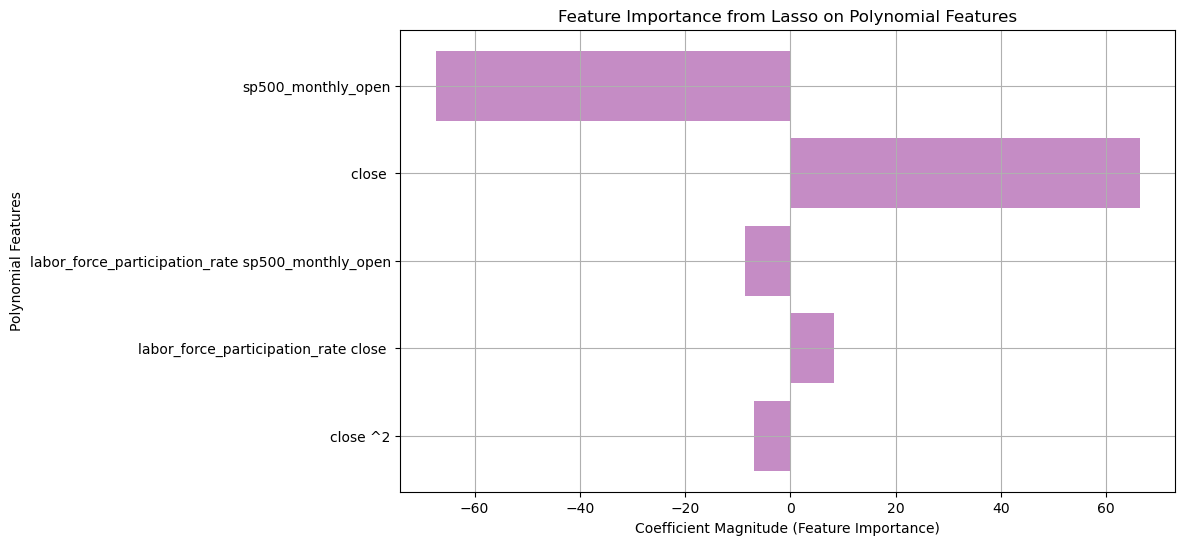

In [32]:
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Get the top 5 features and their coefficients
top_5_features = sorted_features[:5]
features, coefficients = zip(*top_5_features)


plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, alpha = 0.45, color = 'purple')
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Polynomial Features")
plt.title("Feature Importance from Lasso on Polynomial Features")
plt.gca().invert_yaxis()  
plt.grid()
plt.show()


We can see that the most important feauture is the savings rate squared, which has a positive relationship with the monthly return. This is interesting given that in the simple linear regression model with lasso regularization, the coefficient value for the savings rate was extremely small compared to more significant features in that model. This may be because the true relationship between the monthly savings rate and the monthly return of the S&P500 is quadratic. Take for example, a higher savings rate beyond a certain points means people are investing more into the stock market, pushing up the market's valuation that month. However, a low savings rate beyond a certain point means that consumers are spending more, which leads to higher profits and thus valuations. 

The next most significant predictor is the monthly trading volume of the S&P500 squared. Again, this may be because the true relationship between monthly trading volume and monthly return is quadratic: relatively high trading volume could mean more excitement about the market and lead to more buying while relativlely low trading volume could mean stable market conditions and "business as usual" – which usually means the market goes up. The GDP and monthly volume interaction term is also significant, revealing a potential interaction between these two features. This may be the case as higher GDP growth and higher trading volume means more optimistic investors are rapidly buying into the market, while a positive trading volume and negative GDP growth (measured in standard deviations) could mean investors are selling due to fears of a recession. Finally, the S&P500 PE ratio squared is also a significant term, and this could be because relatively low PE ratios mean the market is undervalued and investors begin rapidly buying while relatively high PE ratios indicates a bull market or bubble where the market keeps going up.

However, regardless of these intuitive explanations, it is important to perform more rigorous testing to see if these relationships are more than mere correlations. Thus, we will perform causal inference on the monthly savings rate, the most significant feature for this model, to test if there is a causal relationship between this and the monthly return. 

# 🎓 Testing for Causality

We saw that the monthly closing price was the most important feature in our chosen model. The next step is to see if there is any causal relationship between monthly closing price and monthly returns on
S&P 500. 


In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.api import WLS, add_constant

data = pd.read_csv('Final Submission/merged_df.csv')  

# Calculating percentage change in savings rate 
data['Savings_R_Change_Percent'] = data['savings_rate'].pct_change()

# Drop rows with missing values resulting from pct_change()
data = data.dropna(subset=['Savings_R_Change_Percent', 'percent_change'])

# Calculating percentage change in S&P 500 returns 
data['percent_change'] = data['percent_change'].pct_change()  

# Drop rows with missing values
data = data.dropna(subset=['Savings_R_Change_Percent', 'percent_change'])

# Fitting the propensity score model 
gps_model = LinearRegression()
gps_model.fit(data[['Savings_R_Change_Percent']], data['percent_change'])
data['Propensity_Score'] = gps_model.predict(data[['Savings_R_Change_Percent']])

# Clamp propensity scores to avoid extremes
data['Propensity_Score'] = data['Propensity_Score'].clip(lower=0.01, upper=0.99)

# Calculating inverse probability weights (IPW)
data['IPW'] = 1 / data['Propensity_Score']
data['IPW'] = data['IPW'] / data['IPW'].sum() 

X = add_constant(data[['Savings_R_Change_Percent']])  
Y = data['percent_change']  
weighted_model = WLS(Y, X, weights=data['IPW']).fit()


print(weighted_model.summary())
data.to_csv('processed_data_with_ipw.csv', index=False)


                            WLS Regression Results                            
Dep. Variable:         percent_change   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.147
Date:                Mon, 16 Dec 2024   Prob (F-statistic):              0.285
Time:                        20:12:46   Log-Likelihood:                -1937.1
No. Observations:                 323   AIC:                             3878.
Df Residuals:                     321   BIC:                             3886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The p value is 0.285 which is much bigger than 0.05 so it is not statistically significant and there does not seem to be a causal effect by the savings rate squared on the S&P 500 returns. 

# 🎓 Results 

### 1) Conclusions and Speculations
Based on our project, a 2nd-degree polynomial regression model with lasso regularization can best predict the monthly return of the S&P500 from the above features. Based on our model, the savings rate squared had the strongest correlation with the monthly return on the S&P500. Other significant features were the monthly trading volume squared, interaction between GDP and trading volume, the S&P500 average PE ratio squared, and, to a much lesser extent, the interaction between GDP and unemployment rate. The 2nd-degree polynomial model most likely worked best because the true relationship between some of these features and the monthly return is quadratic. As mentioned above, divergences from standard conditions regarding the savings rate, trading volume, and the PE ratio might lead to significant positive outcomes for the market. This is easier to understand given the model is trained on standardized data, so significant deviations from the mean could indicate higher market returns.  

### 2) Strengths and Weaknesses
One strength of our project is our use of strategies to refine our linear regression model. Identifying early on that linear regression is likely a better model for this task, we used a number of techniques such as lasso regularization and the inclusion of polynomial terms to improve our baseline model. Lasso regularization allowed us to feature select given relationships among the predictor variables, and the 2nd-degree polynomial terms allowed us to see relationships in the data that weren't immediately obvious from our scatterplots in the EDA section. 

One of the weakenesses of our project is that our data only goes back to 1985. Stock market data goes much further back, although we were limited by how far back some of our predictors went. As a result, instead of imputing missing values, we decided to predict on the available data we had. However, this might have obscured the relationship between some of our more macro-level features (such as GDP or interest rates) as they might have a stronger relationship to stock market performance over greater periods of time. Moreover, different features might have stronger relationships with stock market performance at different periods in history, which is an issue our project did not take into account. We may also have overlooked some important features that can contribute to predicting stock market performance as there is a large multitude of potential predictors. The exclusion of these features may negatively impact the performance of our models and its predictive ability for traders. 


### 3) Future Works
Future projects should analyze a greater number of features over a greater time period to better understand the drivers of stock market performance. A focus should be on identifying specific indicators, whether at the macro- or micro-level, to predict stock market performance. Our identification of the savings rate squared was a start, but there may be other indicators and our project may have misidentified this feature's importance. Future projects could also potentially utilize heterogenous ensemble methods such as mixture of experts to predict on different periods of time, if different factors contributed more to stock market performance during some periods than others.    